'placement.csv' is a file containing 100 records of: 

    1.student's cgpa (scale out of 10) 
    2.iq 
    3.placement(job) 
        -0: student didn't got placement
        -1: student got placement

Dependent variable: cgpa, iq
Independent variable: placement

Here, logistic regression model is used to identify a student that he/she will get placement or not based on his/her score of cgpa & iq.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('placement.csv')
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


Step1: Preprocess + EDA + Feature Selection

In [4]:
# remove col 1: unnamed column
df = df.iloc[:,1:]
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


Text(0, 0.5, 'iq')

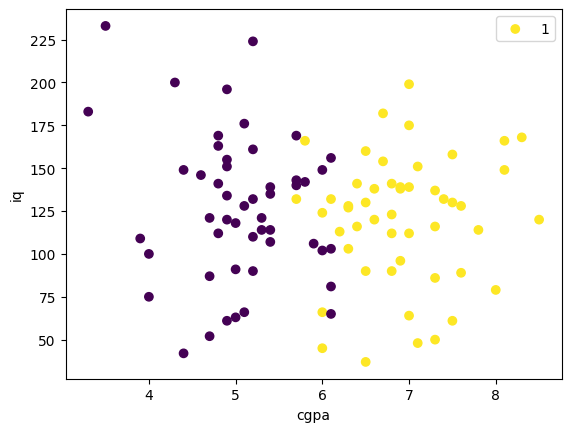

In [5]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])
plt.legend(df['placement'])
plt.xlabel('cgpa')
plt.ylabel('iq')

As per the visualization of the data, we would use, logistic regression to train the model

Step 2: Extract input & output columns

In [6]:
# input
input = df.iloc[:,:2]
# output
output = df.iloc[:,-1]
output

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

Step 3: Split Train & Test values. 
Train = 90% data

In [7]:
from sklearn.model_selection import train_test_split
train_input,test_input,train_output,test_output = train_test_split(input,output,train_size=0.9)

Step 4: Scale the data

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()
train_input = scaler.fit_transform(train_input)
train_input

array([[ 0.62293678,  1.440195  ],
       [-1.13732415, -0.90303378],
       [ 0.00684546, -1.42101067],
       [ 0.09485851, -0.50838472],
       [-0.96129805,  0.25624783],
       [-1.22533719,  0.55223462],
       [ 0.79896288,  0.35491009],
       [-1.40136329,  0.62623132],
       [ 0.00684546,  0.00959216],
       [ 0.88697592,  1.26753604],
       [ 0.18287155, -0.26172906],
       [ 0.09485851,  0.20691669],
       [-0.96129805,  0.77422471],
       [-1.75341547, -0.58238142],
       [-0.87328501, -1.49500737],
       [ 0.97498897,  0.67556245],
       [-1.0493111 ,  0.42890679],
       [ 0.00684546,  0.62623132],
       [-1.13732415, -0.06440453],
       [-0.96129805, -1.5443385 ],
       [-0.25719368,  0.40424122],
       [ 2.03114553,  1.09487707],
       [-1.0493111 , -0.28639463],
       [-0.60924587, -0.2370635 ],
       [ 1.4150542 ,  0.10825443],
       [-0.25719368,  1.11954264],
       [ 0.44691069, -2.13631209],
       [ 1.85511944,  0.62623132],
       [ 0.53492374,

In [10]:
test_input = scaler.transform(test_input)
test_input

array([[-2.3695068 ,  1.46486056],
       [ 0.53492374,  0.35491009],
       [-0.69725891, -0.33572576],
       [ 0.62293678,  0.74955915],
       [-0.87328501, -0.13840123],
       [ 1.32704116,  0.15758556],
       [-0.08116759, -0.43438803],
       [ 0.88697592,  0.37957566],
       [ 0.44691069, -0.82903708],
       [ 0.09485851, -1.44567624]])

Step 5: Train the model

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
# logistic regression object
lr_object = LogisticRegression()

In [13]:
# give training data to lr_object
lr_object.fit(train_input,train_output)

LogisticRegression()

Step 6: Evaluate model

In [14]:
predict_test = lr_object.predict(test_input)
print(test_output,predict_test)

17    0
48    1
92    0
74    1
67    0
83    1
1     0
32    1
79    1
56    0
Name: placement, dtype: int64 [0 1 0 1 0 1 0 1 1 1]


Step 7: Check Model accuracy rate 

In [15]:
from sklearn.metrics import accuracy_score

In [18]:
accuracy_score(test_output,predict_test) # 90% accurate

0.9

Plotting the model

In [21]:
from mlxtend.plotting import plot_decision_regions

<AxesSubplot: >

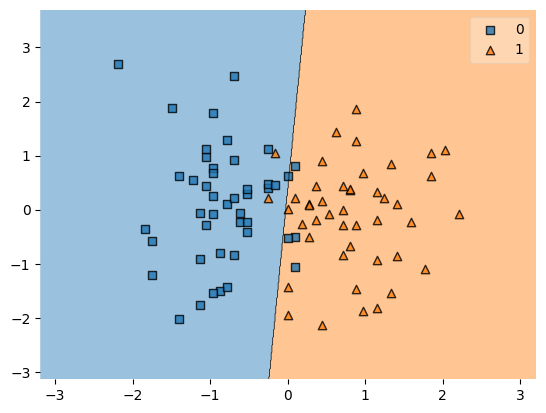

In [24]:
plot_decision_regions(train_input,train_output.values,clf=lr_object)

Step 8: Deploy model in pickle

In [25]:
import pickle

In [28]:
with open('lr_model.pkl','wb') as model:
    pickle.dump(lr_object,model)

In [ ]:
# with open('lr_model.pkl','rb') as model_open:
#     pickle.load(model_open).score([1,2],[2,3])
